In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("kaggle_survey_2022_responses.csv.zip", low_memory=False)
df.shape

(23998, 296)

In [4]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [6]:
df.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

### Question

In [7]:
q = df.iloc[0]
q

Duration (in seconds)                                Duration (in seconds)
Q2                                             What is your age (# years)?
Q3                                  What is your gender? - Selected Choice
Q4                               In which country do you currently reside?
Q5                       Are you currently a student? (high school, uni...
                                               ...                        
Q44_8                    Who/what are your favorite media sources that ...
Q44_9                    Who/what are your favorite media sources that ...
Q44_10                   Who/what are your favorite media sources that ...
Q44_11                   Who/what are your favorite media sources that ...
Q44_12                   Who/what are your favorite media sources that ...
Name: 0, Length: 296, dtype: object

In [8]:
df.iloc[0]["Q2"]

'What is your age (# years)?'

<AxesSubplot:>

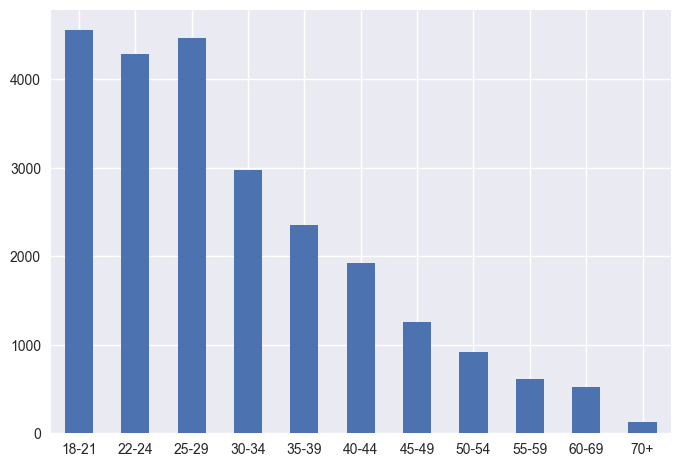

In [9]:
df["Q2"][1:].value_counts().sort_index().plot(kind="bar", rot=0)

In [10]:
"Q6" in df.iloc[0].index

False

In [11]:
def q_plot(df, q_no):
    if q_no in df.iloc[0].index:
        print(df.iloc[0][q_no])
        q_count = df[q_no][1:].value_counts().sort_index()
        plot_kind = "bar"
        figsize = (10, 4)
        if len(q_count) > 5:
            plot_kind = "barh"
            figsize = (10, 10)
        q_count.plot(kind=plot_kind, rot=0, figsize=figsize)
    else:
        print("Invalid Question No.")

What is your gender? - Selected Choice


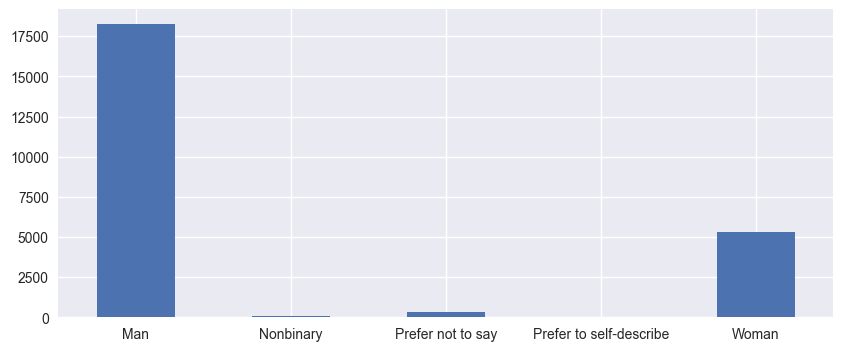

In [12]:
q_plot(df, q_no="Q3")

In which country do you currently reside?


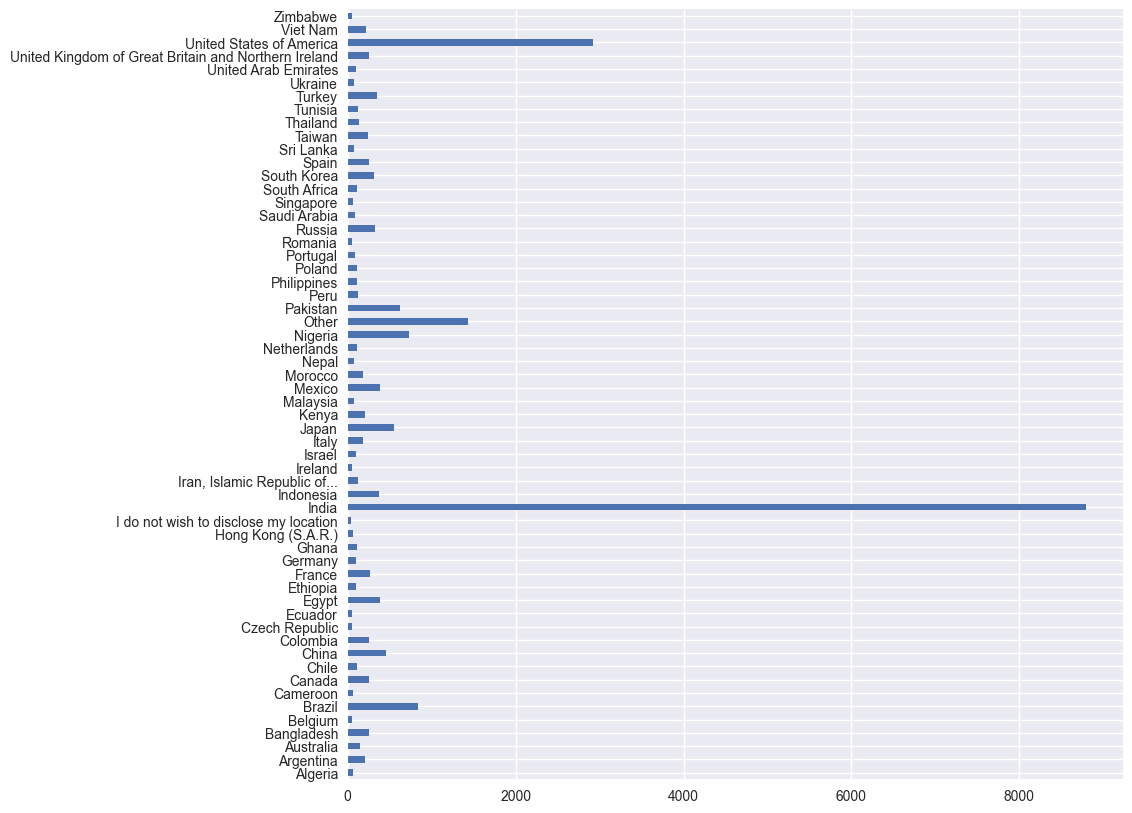

In [13]:
q_plot(df, q_no="Q4")

Are you currently a student? (high school, university, or graduate)


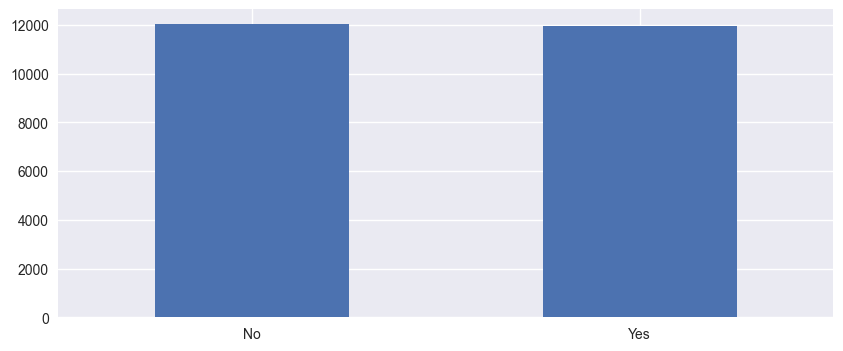

In [14]:
q_plot(df, q_no="Q5")

In [15]:
q_plot(df, q_no="Q6")

Invalid Question No.
